# Scaling

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import sklearn.preprocessing
from sklearn.model_selection import train_test_split
import pandas as pd
import wrangle
import seaborn as sns

#visulization settings
import graphviz
from sklearn.tree import export_graphviz
import matplotlib.style as style 
style.available
style.use('seaborn-notebook') #sets the size of the charts
style.use('seaborn-colorblind') #sets color of charts

### 1. Apply the scalers we talked about in this lesson to your data and visualize the results in a way that can .

In [2]:
train, validate, test = wrangle.wrangle_telco() 

In [3]:
train.head()

,monthly_charges,tenure,total_charges
customer_id,,,
7501-IWUNG,73.80,61,4616.05
1303-SRDOK,69.05,55,3842.60
3967-VQOGC,24.90,67,1680.25
3777-XROBG,19.55,58,1079.65
5075-JSDKI,24.45,59,1493.10


<AxesSubplot:>

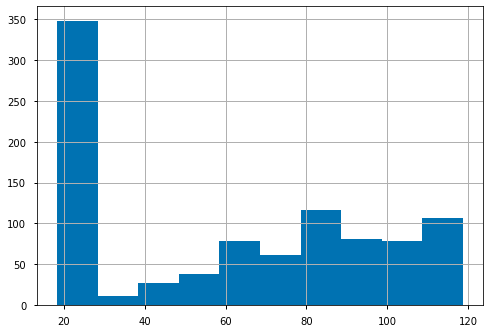

In [4]:
train.monthly_charges.hist()

In [5]:
train.monthly_charges.min()

18.4

In [6]:
train.monthly_charges.max()

118.65

<AxesSubplot:>

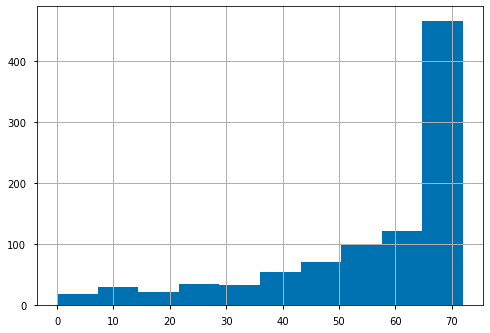

In [7]:
train.tenure.hist()

In [8]:
train.tenure.min()

0

In [9]:
train.tenure.max()

72

<AxesSubplot:>

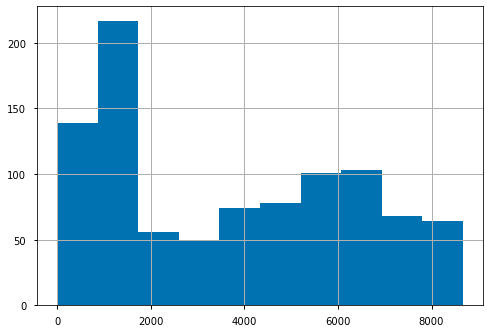

In [10]:
train.total_charges.hist()

#### Scaling
- Do the 3 Step sklearn API:
    - Make the thing (Make a scaler object
    - Fit the thing (on the train data)
    - Use the thing

In [11]:
#Make the thing
scaler = sklearn.preprocessing.MinMaxScaler()

In [12]:
#We fit on the training data
#in a way, we treat our scalers like our ML models
# we onlu .fit on training data
scaler.fit(train)

MinMaxScaler()

In [13]:
train_scaled = scaler.transform(train)
validate_scaled = scaler.transform(validate)
test_scaled = scaler.transform(test)

In [14]:
train_scaled[0:5]

array([[0.55261845, 0.84722222, 0.53241024],
       [0.50523691, 0.76388889, 0.44320135],
       [0.06483791, 0.93055556, 0.19379823],
       [0.01147132, 0.80555556, 0.12452567],
       [0.06034913, 0.81944444, 0.17221255]])

In [15]:
#turn the numpy arrays into dataframes
train_scaled = pd.DataFrame(train_scaled, columns=train.columns)
validate_scaled = pd.DataFrame(validate_scaled, columns=train.columns)
test_scaled = pd.DataFrame(test_scaled, columns=train.columns)


In [16]:
train_scaled.head()

,monthly_charges,tenure,total_charges
0,0.552618,0.847222,0.532410
1,0.505237,0.763889,0.443201
2,0.064838,0.930556,0.193798
3,0.011471,0.805556,0.124526
4,0.060349,0.819444,0.172213


<AxesSubplot:>

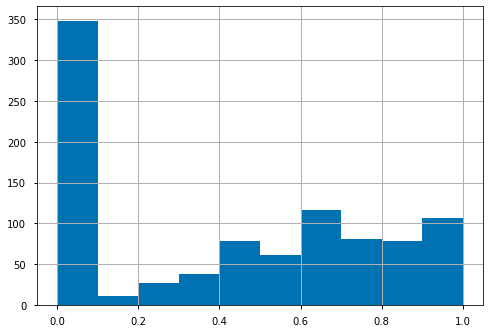

In [17]:
#scaled
train_scaled.monthly_charges.hist()

<AxesSubplot:>

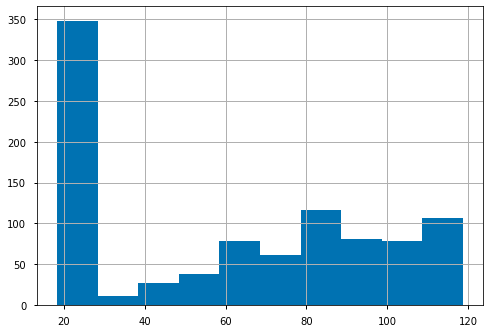

In [18]:
#not scaled
train.monthly_charges.hist()

### Min-Max Scaling

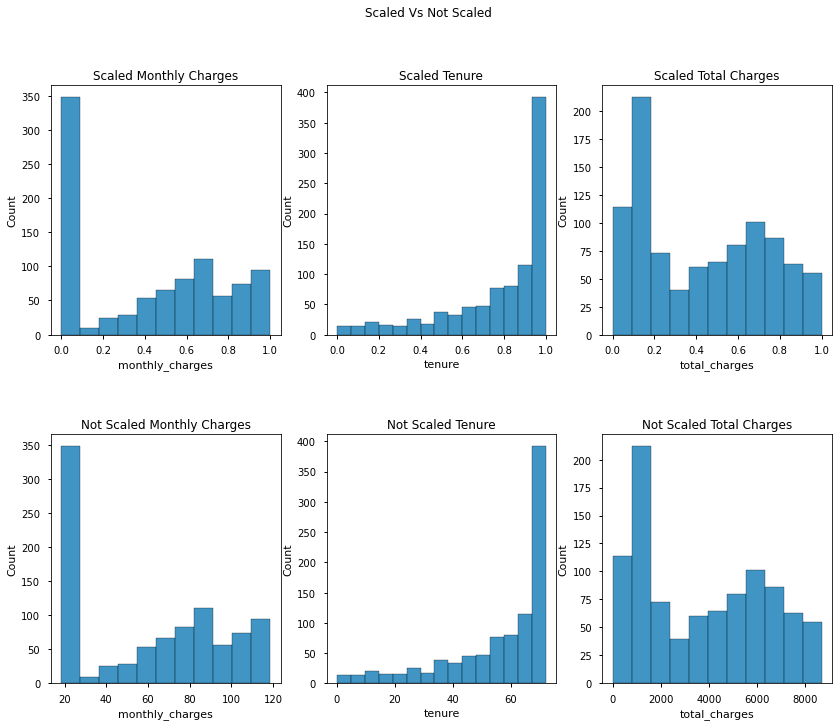

In [30]:
plt.figure(figsize=(14, 11))
plt.suptitle('Scaled Vs Not Scaled')

#scaled
plt.subplot(231)
sns.histplot(data=train_scaled, x='monthly_charges')
plt.title('Scaled Monthly Charges')

plt.subplot(232)
sns.histplot(data=train_scaled, x='tenure')
plt.title('Scaled Tenure')

plt.subplot(233)
sns.histplot(data=train_scaled, x='total_charges')
plt.title('Scaled Total Charges')

#not scaled
plt.subplot(234)
sns.histplot(data=train, x='monthly_charges')
plt.title('Not Scaled Monthly Charges')

plt.subplot(235)
sns.histplot(data=train, x='tenure')
plt.title('Not Scaled Tenure')

plt.subplot(236)
sns.histplot(data=train, x='total_charges')
plt.title('Not Scaled Total Charges')

plt.subplots_adjust(hspace=0.4)

### Standard Scaler

In [32]:
train2, validate2, test2 = wrangle.wrangle_telco()

In [33]:
#make the thing
scaler = sklearn.preprocessing.StandardScaler()
#We fit on the training data
#in a way, we treat our scalers like our ML models
# we onlu .fit on training data
scaler.fit(train2)


StandardScaler()

In [34]:
train2_scaled = scaler.transform(train2)
validate2_scaled = scaler.transform(validate2)
test2_scaled = scaler.transform(test2)

In [35]:
train2_scaled[0:5]

array([[ 0.36175696,  0.24556243,  0.34111389],
       [ 0.22511006, -0.08150949,  0.04351028],
       [-1.0449869 ,  0.57263435, -0.78850624],
       [-1.19889445,  0.08202647, -1.01960163],
       [-1.05793239,  0.13653845, -0.86051673]])

In [36]:
#turn the numpy arrays into dataframes
train2_scaled = pd.DataFrame(train2_scaled, columns=train2.columns)
validate2_scaled = pd.DataFrame(validate2_scaled, columns=train2.columns)
test2_scaled = pd.DataFrame(test2_scaled, columns=train2.columns)

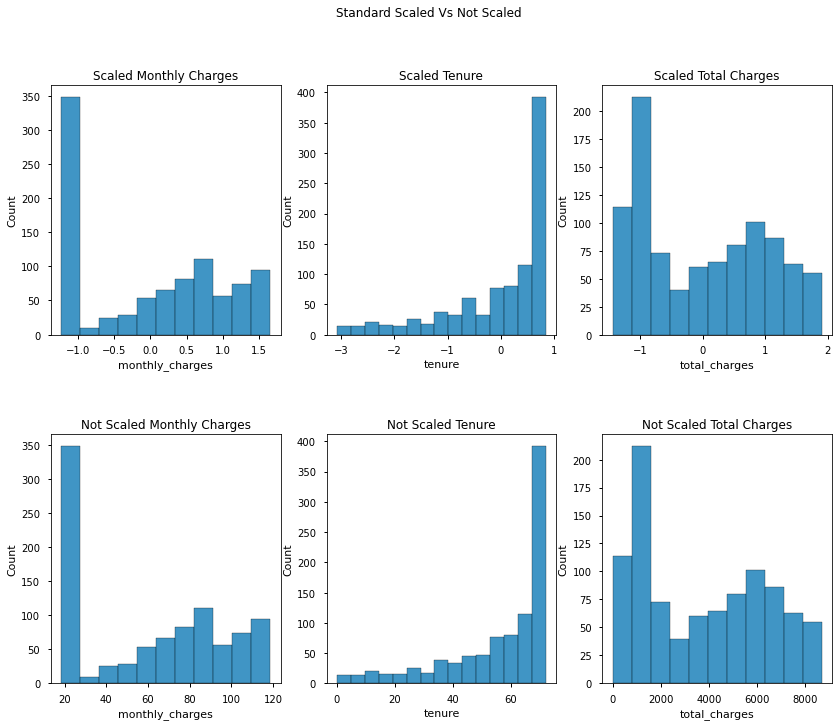

In [37]:
#plot the things

plt.figure(figsize=(14, 11))
plt.suptitle('Standard Scaled Vs Not Scaled')

#scaled
plt.subplot(231)
sns.histplot(data=train2_scaled, x='monthly_charges')
plt.title('Scaled Monthly Charges')

plt.subplot(232)
sns.histplot(data=train2_scaled, x='tenure')
plt.title('Scaled Tenure')

plt.subplot(233)
sns.histplot(data=train2_scaled, x='total_charges')
plt.title('Scaled Total Charges')

#not scaled
plt.subplot(234)
sns.histplot(data=train2, x='monthly_charges')
plt.title('Not Scaled Monthly Charges')

plt.subplot(235)
sns.histplot(data=train2, x='tenure')
plt.title('Not Scaled Tenure')

plt.subplot(236)
sns.histplot(data=train2, x='total_charges')
plt.title('Not Scaled Total Charges')

plt.subplots_adjust(hspace=0.4)

#### The only aspect that changes is the scale, not the structure.

### Robust Scaler

In [39]:
train3, validate3, test3 = wrangle.wrangle_telco()


In [40]:
#make the thing
scaler = sklearn.preprocessing.StandardScaler()
#We fit on the training data
#in a way, we treat our scalers like our ML models
# we onlu .fit on training data
scaler.fit(train3)


StandardScaler()

In [41]:
train3_scaled = scaler.transform(train3)
validate3_scaled = scaler.transform(validate3)
test3_scaled = scaler.transform(test3)

In [42]:
train3_scaled[0:5]

array([[ 0.36175696,  0.24556243,  0.34111389],
       [ 0.22511006, -0.08150949,  0.04351028],
       [-1.0449869 ,  0.57263435, -0.78850624],
       [-1.19889445,  0.08202647, -1.01960163],
       [-1.05793239,  0.13653845, -0.86051673]])

In [43]:
#turn the numpy arrays into dataframes
train3_scaled = pd.DataFrame(train3_scaled, columns=train2.columns)
validate3_scaled = pd.DataFrame(validate3_scaled, columns=train2.columns)
test3_scaled = pd.DataFrame(test3_scaled, columns=train2.columns)

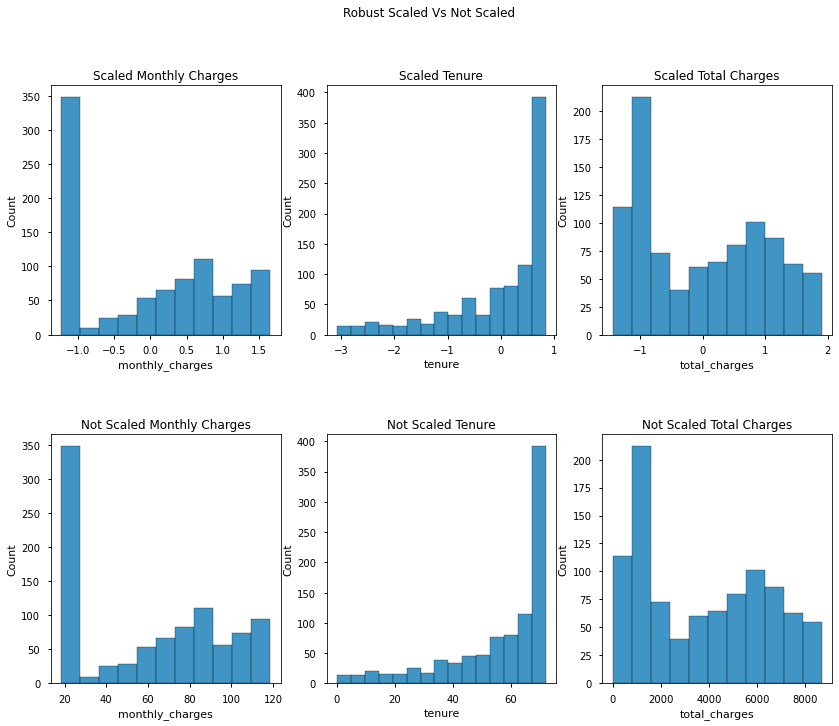

In [44]:
#plot the things


plt.figure(figsize=(14, 11))
plt.suptitle('Robust Scaled Vs Not Scaled')

#scaled
plt.subplot(231)
sns.histplot(data=train3_scaled, x='monthly_charges')
plt.title('Scaled Monthly Charges')

plt.subplot(232)
sns.histplot(data=train3_scaled, x='tenure')
plt.title('Scaled Tenure')

plt.subplot(233)
sns.histplot(data=train3_scaled, x='total_charges')
plt.title('Scaled Total Charges')

#not scaled
plt.subplot(234)
sns.histplot(data=train3, x='monthly_charges')
plt.title('Not Scaled Monthly Charges')

plt.subplot(235)
sns.histplot(data=train3, x='tenure')
plt.title('Not Scaled Tenure')

plt.subplot(236)
sns.histplot(data=train3, x='total_charges')
plt.title('Not Scaled Total Charges')

plt.subplots_adjust(hspace=0.4)

### 2. Apply the .inverse_transform method to your scaled data. Is the resulting dataset the exact same as the original data?

In [45]:
train4, validate4, test4 = wrangle.wrangle_telco()

In [46]:
#make the thing
scaler = sklearn.preprocessing.StandardScaler()
#We fit on the training data
#in a way, we treat our scalers like our ML models
# we onlu .fit on training data
scaler.fit(train4)

StandardScaler()

### .inverse_transform

In [50]:
train4_scaled = scaler.inverse_transform(train4)
validate4_scaled = scaler.inverse_transform(validate4)
test4_scaled = scaler.inverse_transform(test4)

In [51]:
train4_scaled[0:5]

array([[2.62659601e+03, 1.17551519e+03, 1.20005055e+07],
       [2.46148066e+03, 1.06544766e+03, 9.99036555e+06],
       [9.26776954e+02, 1.28558273e+03, 4.37057624e+06],
       [7.40804930e+02, 1.12048143e+03, 2.80966082e+06],
       [9.11134447e+02, 1.13882602e+03, 3.88418709e+06]])

In [53]:
#turn the numpy arrays into dataframes
train4_inverse = pd.DataFrame(train3_scaled, columns=train2.columns)
validate4_inverse = pd.DataFrame(validate3_scaled, columns=train2.columns)
test4_inverse = pd.DataFrame(test3_scaled, columns=train2.columns)

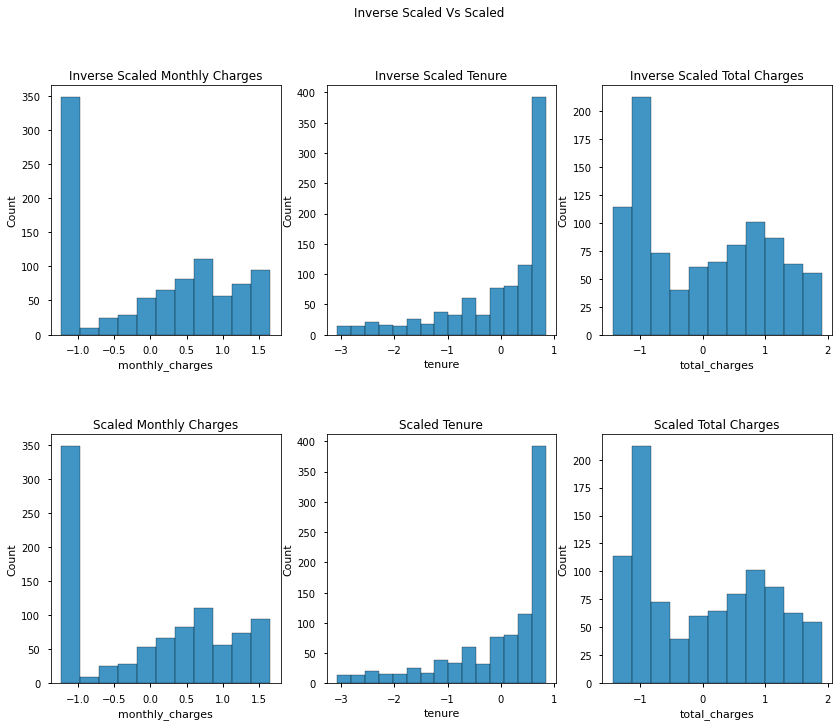

In [54]:
#plot the things


plt.figure(figsize=(14, 11))
plt.suptitle('Inverse Scaled Vs Scaled')

#scaled
plt.subplot(231)
sns.histplot(data=train4_inverse, x='monthly_charges')
plt.title('Inverse Scaled Monthly Charges')

plt.subplot(232)
sns.histplot(data=train4_inverse, x='tenure')
plt.title('Inverse Scaled Tenure')

plt.subplot(233)
sns.histplot(data=train4_inverse, x='total_charges')
plt.title('Inverse Scaled Total Charges')

#not scaled
plt.subplot(234)
sns.histplot(data=train3_scaled, x='monthly_charges')
plt.title('Scaled Monthly Charges')

plt.subplot(235)
sns.histplot(data=train3_scaled, x='tenure')
plt.title('Scaled Tenure')

plt.subplot(236)
sns.histplot(data=train3_scaled, x='total_charges')
plt.title('Scaled Total Charges')

plt.subplots_adjust(hspace=0.4)

### 3. Read the documentation for sklearn's QuantileTransformer. Use normal for the output_distribution and apply this scaler to your data. Visualize the result of your data scaling.

### 4. Use the QuantileTransformer, but omit the output_distribution argument. Visualize your results. What do you notice?

### 5. Based on the work you've done, choose a scaling method for your dataset. Write a function within your prepare.py that accepts as input the train, validate, and test data splits, and returns the scaled versions of each. Be sure to only learn the parameters for scaling from your training data!